In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# configuring the path of json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset # downloading the dataset

 89% 145M/163M [00:01<00:00, 103MB/s] 
100% 163M/163M [00:01<00:00, 118MB/s]


In [ ]:
# extracting the compressed data from zip
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('data extracted')

data extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Required Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mltimg
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
with_masks = os.listdir('/content/data/with_mask')
with_masks[0:4]

['with_mask_265.jpg',
 'with_mask_2307.jpg',
 'with_mask_3378.jpg',
 'with_mask_1555.jpg']

In [ ]:
without_masks = os.listdir('/content/data/without_mask')
without_masks[0:4]

['without_mask_1637.jpg',
 'without_mask_58.jpg',
 'without_mask_2881.jpg',
 'without_mask_1355.jpg']

**Creating Labels**

1 -> with mask

0 -> *without mask*

In [ ]:
with_masks_label = [1]*len(with_masks)
without_masks_label = [0]*len(without_masks)

In [ ]:
label = with_masks_label + without_masks_label

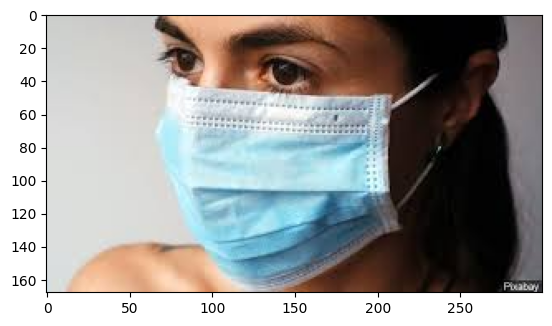

In [ ]:
# sample mask img
img = plt.imread('/content/data/with_mask/'+with_masks[-1])
imgplot = plt.imshow(img)
plt.show()

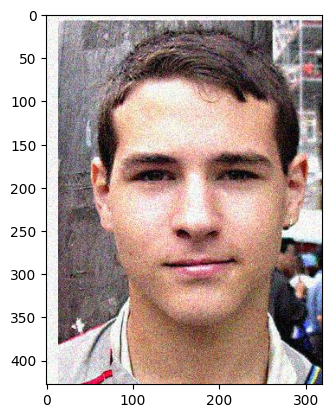

In [ ]:
# sample without mask img
img = plt.imread('/content/data/without_mask/'+without_masks[3])
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(428, 320, 3)

Image Processing

    resize the image
    convert it into np array

In [ ]:
# converting image to numpy array

withmask_file_path = '/content/data/with_mask/'
withoutmask_file_path = '/content/data/without_mask/'

data = []

for image in with_masks:
  img = Image.open(withmask_file_path + image)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

for image in without_masks:
  img = Image.open(withoutmask_file_path + image)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#converting data to numpy arrays
X = np.array(data)
y = np.array(label)

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes = 2

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(num_classes,activation='sigmoid'))

In [ ]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the model

history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 16s 25ms/step - loss: 0.5766 - acc: 0.7454 - val_loss: 0.3338 - val_acc: 0.8727
Epoch 2/10
170/170 [==============================] - 4s 22ms/step - loss: 0.3009 - acc: 0.8804 - val_loss: 0.2250 - val_acc: 0.8992
Epoch 3/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2510 - acc: 0.9025 - val_loss: 0.2129 - val_acc: 0.9058
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2059 - acc: 0.9207 - val_loss: 0.2004 - val_acc: 0.9174
Epoch 5/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1694 - acc: 0.9353 - val_loss: 0.2072 - val_acc: 0.9273
Epoch 6/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1383 - acc: 0.9494 - val_loss: 0.2136 - val_acc: 0.9289
Epoch 7/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1219 - acc: 0.9520 - val_loss: 0.2190 - val_acc: 0.9306
Epoch 8/10
170/170 [==============================] - 3s 19ms/step -

**Model Evaluation**

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print('loss: ',loss)
print('accuracy: ',accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2287 - acc: 0.9457
loss:  0.22874154150485992
accuracy:  0.9457312822341919


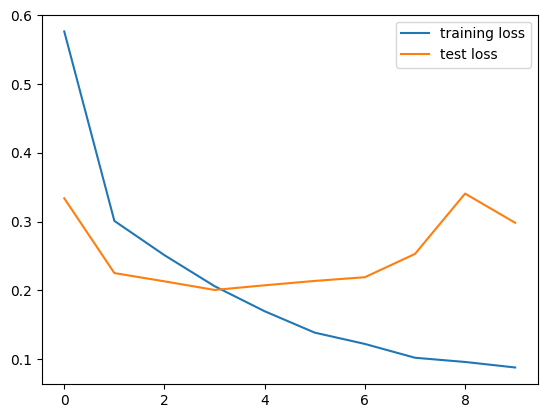

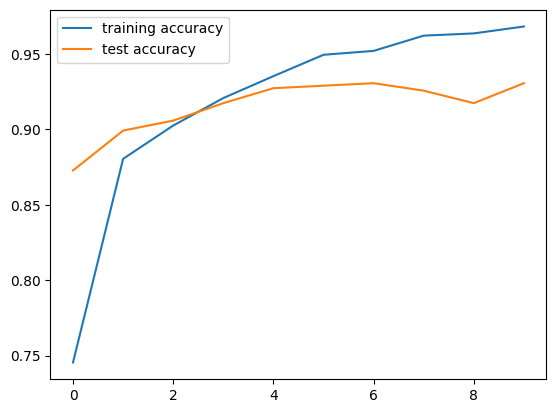

In [ ]:
# plotting the loss and accuracy of model
h = history

# loss
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='test loss')
plt.legend()
plt.show()

# accuracy
plt.plot(h.history['acc'],label='training accuracy')
plt.plot(h.history['val_acc'],label='test accuracy')
plt.legend()
plt.show()


***Prediction***

Enter the path of image for prediction/content/data/without_mask/without_mask_1355.jpg


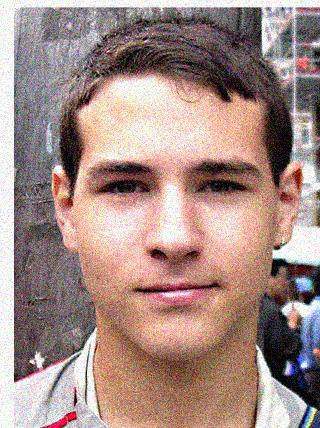

1/1 [==============================] - 0s 42ms/step
[[0.5626813 0.5032595]]
0
Not Wearing a Mask


In [ ]:
prediction_file_path = input('Enter the path of image for prediction')

img = cv2.imread(prediction_file_path)

cv2_imshow(img)

img_resized = cv2.resize(img,(128,128))
img_scaled = img_resized/255
img_reshaped = np.reshape(img_scaled,[1,128,128,3])

prediction = model.predict(img_reshaped)

print(prediction)

pred_label = np.argmax(prediction)

print(pred_label)

if pred_label == 1:
  print('Wearing a Mask')
else:
  print('Not Wearing a Mask')
